<a href="https://colab.research.google.com/github/Ravindrakumarnayak/Machine_learning/blob/main/Forcasting_ACF_PACF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from  statsmodels.tsa.stattools import acf,pacf
from  statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
df =pd.read_csv("/content/AirPassengers.csv",index_col= 'Month',parse_dates= True)
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


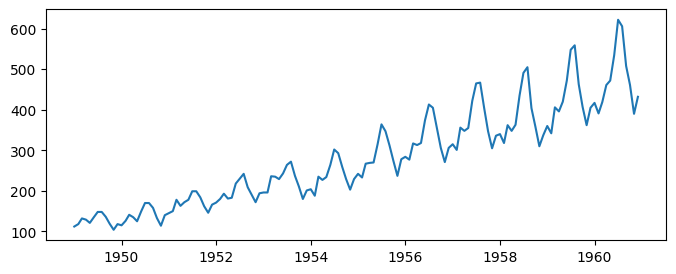

In [7]:
plt.figure(figsize=(8,3))
plt.plot(df)

# upward trend and multiple seasonality

In [9]:
df['Passengers_diff']= df['Passengers'].diff(periods=1) # non stationary to stationary and then differencing
df



,Passengers,Passengers_diff
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
...,...,...
1960-08-01,606,-16.0
1960-09-01,508,-98.0
1960-10-01,461,-47.0


In [12]:
df=df.dropna() # dropping na value
df

,Passengers,Passengers_diff
Month,,
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
1949-06-01,135,14.0
...,...,...
1960-08-01,606,-16.0
1960-09-01,508,-98.0
1960-10-01,461,-47.0


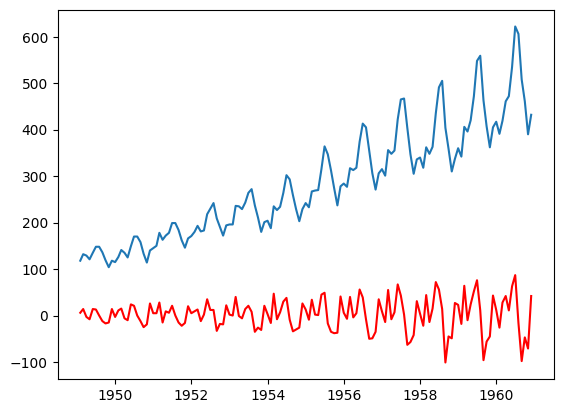

In [16]:
plt.plot(df['Passengers'], label= 'Passengers' )
plt.plot(df['Passengers_diff'], label= "Passengers_diff",color='red' )


In [18]:
acf_values= acf(df['Passengers_diff']) # autocorrelation value
acf_values

array([ 1.        ,  0.30285526, -0.10214755, -0.24127349, -0.30040158,
       -0.09407271, -0.07844257, -0.0923622 , -0.29480158, -0.19177821,
       -0.10491707,  0.28293105,  0.82917786,  0.28450079, -0.10575172,
       -0.22213093, -0.23107603, -0.06227904, -0.06618505, -0.09039973,
       -0.29710958, -0.16273198])

In [19]:
np.round(acf_values,2)

array([ 1.  ,  0.3 , -0.1 , -0.24, -0.3 , -0.09, -0.08, -0.09, -0.29,
       -0.19, -0.1 ,  0.28,  0.83,  0.28, -0.11, -0.22, -0.23, -0.06,
       -0.07, -0.09, -0.3 , -0.16])

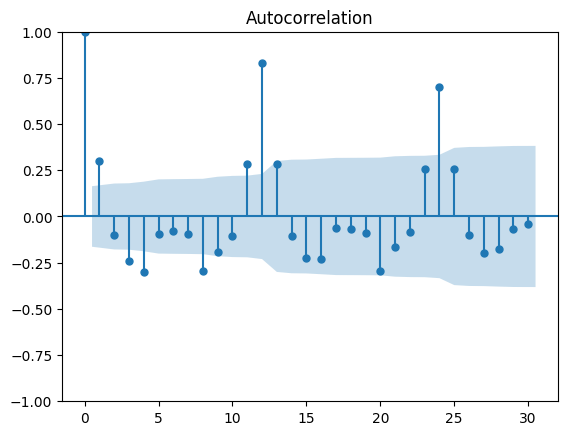

In [26]:
plot_acf(df['Passengers_diff'],lags=30);

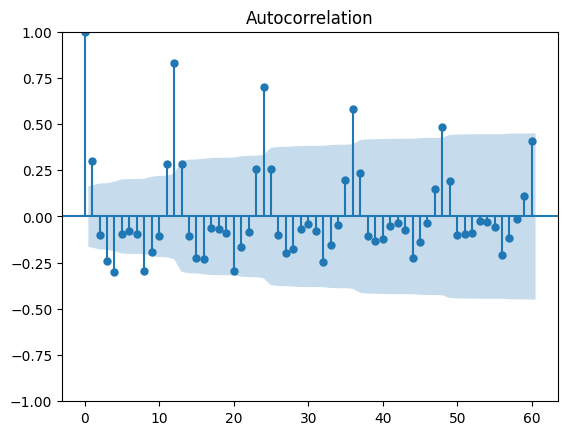

In [27]:
plot_acf(df['Passengers_diff'],lags=60);

In [ ]:
# price decrease every 12 months from lag function

In [28]:
pacf_values= pacf(df['Passengers_diff']) # partial autocorrelation value
pacf_values

array([ 1.        ,  0.30498804, -0.21677838, -0.16414895, -0.22880726,
        0.0102048 , -0.20039114, -0.16381118, -0.4908729 , -0.27906007,
       -0.67292181, -0.41858338,  0.60762779, -0.05342571, -0.30073394,
        0.02024145,  0.13861772,  0.09074817, -0.12191529,  0.01046262,
       -0.21763101, -0.12181244])

In [29]:
np.round(pacf_values,2)

array([ 1.  ,  0.3 , -0.22, -0.16, -0.23,  0.01, -0.2 , -0.16, -0.49,
       -0.28, -0.67, -0.42,  0.61, -0.05, -0.3 ,  0.02,  0.14,  0.09,
       -0.12,  0.01, -0.22, -0.12])

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


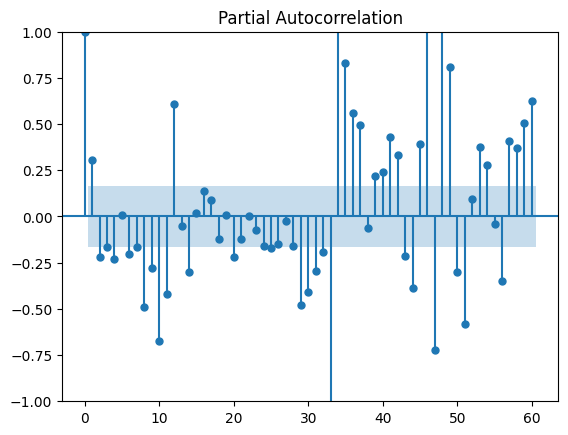

In [30]:
plot_pacf(df['Passengers_diff'],lags=60);

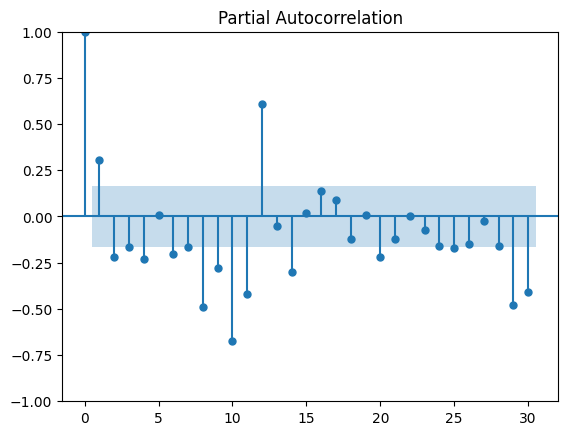

In [31]:
plot_pacf(df['Passengers_diff'],lags=30);

In [ ]:
# from forcasting pacf and acf analysed